##### **Handling Class Imbalance - Synthetic Data Generation via SMOTE**

Training set size: 406708 (70.0%)
Validation set size: 58101 (10.0%)
Testing set size: 116203 (20.0%)


C:\Users\muthu\AppData\Local\Temp\ipykernel_1480\3798698382.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Cover_Type', palette='viridis', order=sorted(df['Cover_Type'].unique()))


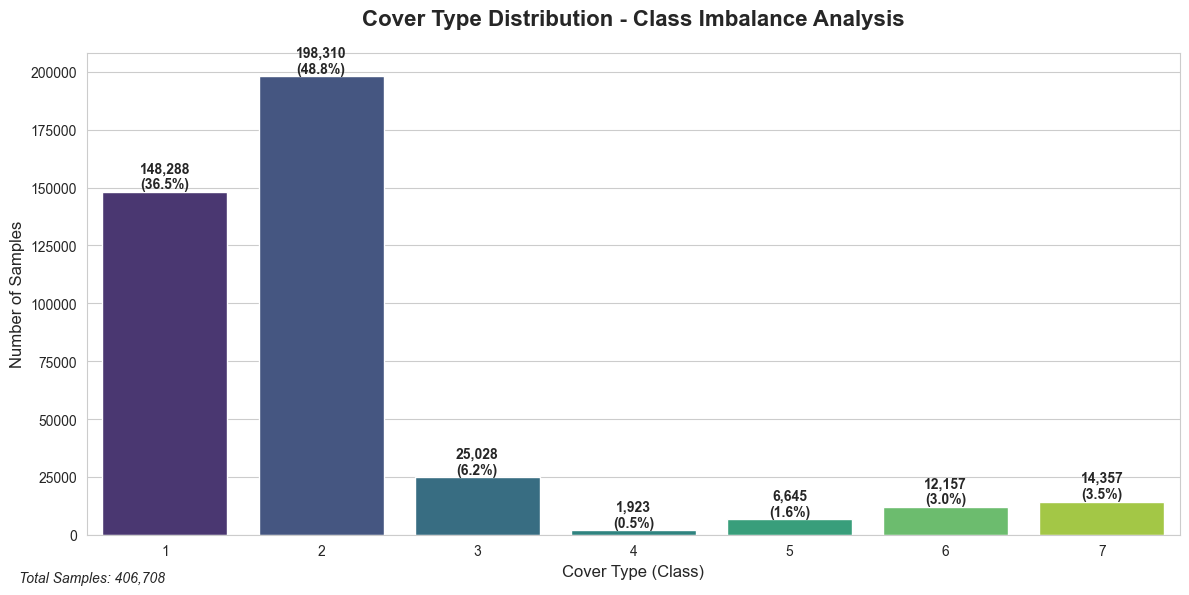

Class Distribution Summary:
Cover Type 1: 148,288 samples (36.46%)
Cover Type 2: 198,310 samples (48.76%)
Cover Type 3: 25,028 samples (6.15%)
Cover Type 4: 1,923 samples (0.47%)
Cover Type 5: 6,645 samples (1.63%)
Cover Type 6: 12,157 samples (2.99%)
Cover Type 7: 14,357 samples (3.53%)

Total Samples: 406,708
Number of Classes: 7
Imbalance Ratio: 103.13:1 (most frequent : least frequent)


In [2]:
from dataset import dataset

import seaborn as sns
import matplotlib.pyplot as plt

d = dataset()
df = d.get_training()

# Set up the plot style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Count the classes
class_counts = df['Cover_Type'].value_counts().sort_index()
total_samples = len(df)

# Create the histogram
ax = sns.countplot(data=df, x='Cover_Type', palette='viridis', order=sorted(df['Cover_Type'].unique()))

# Add count and percentage labels on top of each bar
for i, (class_type, count) in enumerate(class_counts.items()):
        percentage = (count / total_samples) * 100
        ax.text(i, count + 100, f'{count:,}\n({percentage:.1f}%)', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize the plot
plt.title('Cover Type Distribution - Class Imbalance Analysis', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cover Type (Class)', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=0)

# Add total samples info
plt.figtext(0.02, 0.02, f'Total Samples: {total_samples:,}', fontsize=10, style='italic')

# Show the plot
plt.tight_layout()
plt.show()

# Print detailed statistics
print("Class Distribution Summary:")
print("=" * 40)
for class_type in sorted(df['Cover_Type'].unique()):
        count = class_counts[class_type]
        percentage = (count / total_samples) * 100
        print(f"Cover Type {class_type}: {count:,} samples ({percentage:.2f}%)")

print(f"\nTotal Samples: {total_samples:,}")
print(f"Number of Classes: {len(class_counts)}")

# Calculate imbalance ratio (largest class / smallest class)
max_class = class_counts.max()
min_class = class_counts.min()
imbalance_ratio = max_class / min_class
print(f"Imbalance Ratio: {imbalance_ratio:.2f}:1 (most frequent : least frequent)")
